In [47]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [16]:
iris = datasets.load_iris()
X = iris.data[:, 0 : 2]
Y = iris.target

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [55]:
#Grid search to find the best values of the parameters, 'C' and 'gamma'
grid = {"C": [1, 2, 5, 10, 100, 1000, 10000], "gamma": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
abc = GridSearchCV(clf, grid)
abc.fit(X_train, Y_train)
abc.best_estimator_

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
#Icluding the best values of C and gamma
clf = svm.SVC(kernel = 'rbf', C = 2.0, gamma = 1)
clf.fit(X_train, Y_train)
# gamma is 1/2*((sigma)**2)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
clf.score(X_test, Y_test)

0.8157894736842105

In [59]:
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

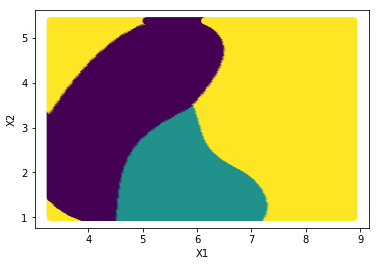

In [61]:
#To show the decision boundary
xx, yy = makegrid(X[:, 0], X[:, 1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()